In [1]:
!pip install arch


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install nelson_siegel_svensson


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# # import data
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# %cd "/content/drive/MyDrive/Colab Notebooks/BU CLASS/Fix inc/"

In [6]:
# List of years for the CSV files
years = range(2019, 2024)  # 2024 is excluded, so it goes up to 2023

dataframes = []

# Loop through each year, load the CSV file, and append the DataFrame to the list
for year in years:
    file_path = f'daily-treasury-rates-{year}.csv'
    if os.path.exists(file_path):  # Check if the file exists
        yearly_data = pd.read_csv(file_path)
        dataframes.append(yearly_data)
    else:
        print(f'File not found: {file_path}')

combined_data = pd.concat(dataframes)
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data_sorted = combined_data.sort_values(by='Date', ascending=False)
combined_data_sorted = combined_data_sorted.reset_index(drop=True)

# Get the list of all column names except '4 Mo'
columns = combined_data_sorted.columns.tolist()
print(columns)
columns.remove('4 Mo')
three_mo_index = columns.index('3 Mo')
columns.insert(three_mo_index + 1, '4 Mo')
combined_data_sorted = combined_data_sorted[columns]

yield_data = combined_data_sorted
data = yield_data
# yield data
data

['Date', '1 Mo', '2 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr', '4 Mo']


Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
0    2023-12-29  5.60  5.59  5.40  5.41  5.26  4.79  4.23  4.01  3.84  3.88   
1    2023-12-28  5.57  5.55  5.45  5.42  5.28  4.82  4.26  4.02  3.83  3.84   
2    2023-12-27  5.55  5.53  5.44  5.42  5.26  4.79  4.20  3.97  3.78  3.81   
3    2023-12-26  5.53  5.52  5.45  5.44  5.28  4.83  4.26  4.05  3.89  3.91   
4    2023-12-22  5.54  5.52  5.44  5.45  5.31  4.82  4.31  4.04  3.87  3.92   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1246 2019-01-08  2.40  2.42  2.46   NaN  2.54  2.60  2.58  2.57  2.58  2.63   
1247 2019-01-07  2.42  2.42  2.45   NaN  2.54  2.58  2.53  2.51  2.53  2.60   
1248 2019-01-04  2.40  2.42  2.42   NaN  2.51  2.57  2.50  2.47  2.49  2.56   
1249 2019-01-03  2.42  2.42  2.41   NaN  2.47  2.50  2.39  2.35  2.37  2.44   
1250 2019-01-02  2.40  2.40  2.42   NaN  2.51  2.60  2.50  2.47  2.49  2.56   

      10 Yr  20 Yr  30 Yr  
0      3.88   4.20   4.03  
1      3.84   4.14   3.98  
2      3.79   4.10   3.95  
3      3.89   4.20   4.04  
4      3.90   4.21   4.05  
...     ...    ...    ...  
1246   2.73   2.88   3.00  
1247   2.70   2.86   2.99  
1248   2.67   2.83   2.98  
1249   2.56   2.75   2.92  
1250   2.66   2.83   2.97  

[1251 rows x 14 columns]

In [7]:
# Define a function that computes the desired value
def compute_four_mo(three_mo, six_mo):
    if pd.isna(three_mo) or pd.isna(six_mo):
        return np.nan  # Return NaN if either value is NaN
    else:
        return (2/3) * three_mo + (1/3) * six_mo

# Apply the function to each row and assign the result to the '4 Mo' column
combined_data_sorted['4 Mo'] = combined_data_sorted.apply(
    lambda row: compute_four_mo(row['3 Mo'], row['6 Mo']) if pd.isna(row['4 Mo']) else row['4 Mo'],
    axis=1
)
combined_data_sorted['4 Mo'] = combined_data_sorted['4 Mo'].round(2)
yield_data = combined_data_sorted
data = yield_data
data

Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
0    2023-12-29  5.60  5.59  5.40  5.41  5.26  4.79  4.23  4.01  3.84  3.88   
1    2023-12-28  5.57  5.55  5.45  5.42  5.28  4.82  4.26  4.02  3.83  3.84   
2    2023-12-27  5.55  5.53  5.44  5.42  5.26  4.79  4.20  3.97  3.78  3.81   
3    2023-12-26  5.53  5.52  5.45  5.44  5.28  4.83  4.26  4.05  3.89  3.91   
4    2023-12-22  5.54  5.52  5.44  5.45  5.31  4.82  4.31  4.04  3.87  3.92   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1246 2019-01-08  2.40  2.42  2.46  2.49  2.54  2.60  2.58  2.57  2.58  2.63   
1247 2019-01-07  2.42  2.42  2.45  2.48  2.54  2.58  2.53  2.51  2.53  2.60   
1248 2019-01-04  2.40  2.42  2.42  2.45  2.51  2.57  2.50  2.47  2.49  2.56   
1249 2019-01-03  2.42  2.42  2.41  2.43  2.47  2.50  2.39  2.35  2.37  2.44   
1250 2019-01-02  2.40  2.40  2.42  2.45  2.51  2.60  2.50  2.47  2.49  2.56   

      10 Yr  20 Yr  30 Yr  
0      3.88   4.20   4.03  
1      3.84   4.14   3.98  
2      3.79   4.10   3.95  
3      3.89   4.20   4.04  
4      3.90   4.21   4.05  
...     ...    ...    ...  
1246   2.73   2.88   3.00  
1247   2.70   2.86   2.99  
1248   2.67   2.83   2.98  
1249   2.56   2.75   2.92  
1250   2.66   2.83   2.97  

[1251 rows x 14 columns]

In [8]:
tau = {
    '1 Mo': 1/12, '2 Mo': 2/12, '3 Mo': 3/12, '4 Mo': 4/12, '6 Mo': 6/12,
    '1 Yr': 1, '2 Yr': 2, '3 Yr': 3, '5 Yr': 5, '7 Yr': 7, '10 Yr': 10, '20 Yr': 20, '30 Yr': 30
}
np.array(list(tau.values()))

array([ 0.08333333,  0.16666667,  0.25      ,  0.33333333,  0.5       ,
        1.        ,  2.        ,  3.        ,  5.        ,  7.        ,
       10.        , 20.        , 30.        ])

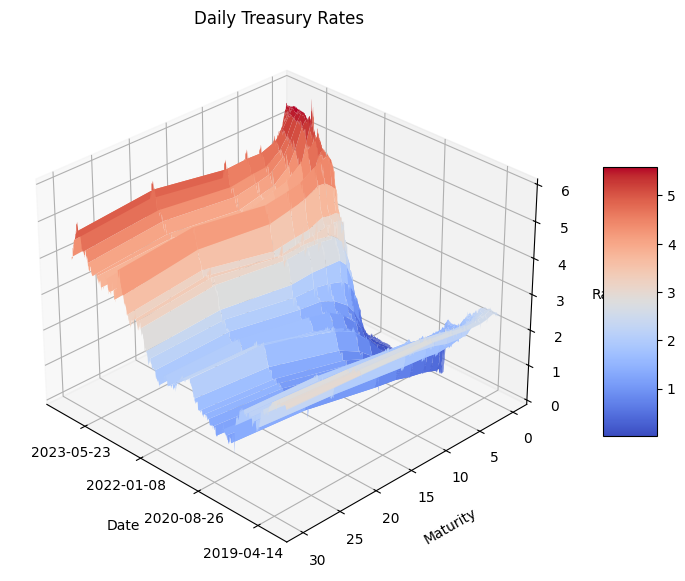

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates

# Convert 'Date' column to datetime objects
yield_data['Date'] = pd.to_datetime(yield_data['Date'])

# Get the columns with interest rates, excluding 'Date' and 'DateNum'
rate_columns = yield_data.columns[1:]

# Prepare the X-axis data (dates)
dates = yield_data['Date']
date_nums = mdates.date2num(dates.dt.to_pydatetime())  # Convert dates to a format matplotlib understands
X = np.tile(date_nums, (len(rate_columns), 1)).T  # Create a grid of date_nums

# Prepare the Y-axis data (maturities)
Y = np.array(list(tau.values()))

# Prepare the Z-axis data (rates)
Z = yield_data[rate_columns].values

# Set up the plot
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D surface plot
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='none')

# Set axis labels
ax.set_xlabel('Date', labelpad=10)
ax.set_ylabel('Maturity', labelpad=10)
ax.set_zlabel('Rate', labelpad=10)

# Set the title
ax.set_title('Daily Treasury Rates')

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Rotate the image for a better viewing angle
ax.view_init(elev=30, azim=135)

# Set the x-axis tick labels as dates
ax.xaxis.set_major_locator(MaxNLocator(5))  # Limit the number of ticks on the X axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set the date format

plt.show()

# Yield Curve Models (Dynamic Nelson-Siegel model, 4-factor extension proposed by Svensson)

In [10]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert maturity columns to years for τ (tau). Assuming '1 Mo' is 1/12 years, '2 Mo' is 2/12 years, etc.
# Preparing the tau values based on the column names.
tau = {
    '1 Mo': 1/12, '2 Mo': 2/12, '3 Mo': 3/12, '4 Mo': 4/12, '6 Mo': 6/12,
    '1 Yr': 1, '2 Yr': 2, '3 Yr': 3, '5 Yr': 5, '7 Yr': 7, '10 Yr': 10, '20 Yr': 20, '30 Yr': 30
}

# Displaying the first few rows to confirm the Date conversion and tau values
print(tau)
data.head()


{'1 Mo': 0.08333333333333333, '2 Mo': 0.16666666666666666, '3 Mo': 0.25, '4 Mo': 0.3333333333333333, '6 Mo': 0.5, '1 Yr': 1, '2 Yr': 2, '3 Yr': 3, '5 Yr': 5, '7 Yr': 7, '10 Yr': 10, '20 Yr': 20, '30 Yr': 30}


Date  1 Mo  2 Mo  3 Mo  4 Mo  6 Mo  1 Yr  2 Yr  3 Yr  5 Yr  7 Yr  \
0 2023-12-29  5.60  5.59  5.40  5.41  5.26  4.79  4.23  4.01  3.84  3.88   
1 2023-12-28  5.57  5.55  5.45  5.42  5.28  4.82  4.26  4.02  3.83  3.84   
2 2023-12-27  5.55  5.53  5.44  5.42  5.26  4.79  4.20  3.97  3.78  3.81   
3 2023-12-26  5.53  5.52  5.45  5.44  5.28  4.83  4.26  4.05  3.89  3.91   
4 2023-12-22  5.54  5.52  5.44  5.45  5.31  4.82  4.31  4.04  3.87  3.92   

   10 Yr  20 Yr  30 Yr  
0   3.88   4.20   4.03  
1   3.84   4.14   3.98  
2   3.79   4.10   3.95  
3   3.89   4.20   4.04  
4   3.90   4.21   4.05

In [11]:
from scipy.optimize import curve_fit
import numpy as np

# Define the Nelson-Siegel function
def nelson_siegel(tau, beta1, beta2, beta3, lambda_):
    """ Nelson-Siegel model function """
    tau = np.asarray(tau)
    return beta1 + beta2 * (1 - np.exp(-lambda_ * tau)) / (lambda_ * tau) + beta3 * ((1 - np.exp(-lambda_ * tau)) / (lambda_ * tau) - np.exp(-lambda_ * tau))

def svensson(tau, beta1, beta2, beta3, beta4, lambda1, lambda2):
    """ Svensson model function """
    tau = np.asarray(tau)
    return (beta1 +
            beta2 * (1 - np.exp(-lambda1 * tau)) / (lambda1 * tau) +
            beta3 * ((1 - np.exp(-lambda1 * tau)) / (lambda1 * tau) - np.exp(-lambda1 * tau)) +
            beta4 * ((1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)))

# Prepare data for fitting
taus = np.array(list(tau.values()))  # array of tau values
yield_data = data.iloc[:, 1:].values  # matrix of yield rates

def get_params(model, columns_names, initial_guess, bounds, maxfev):
    # We will store the parameters for each day's fitting in a list
    parameters = []

    # Perform curve fitting for each day
    for yields in yield_data:
        try:
            #initial_guess = [0.03, -0.02, 0.03, -0.03, 1, 0.1]
            #bounds = ([0, -np.inf, -np.inf, -np.inf, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
            popt, _ = curve_fit(model, taus, yields, p0=initial_guess, bounds=bounds, maxfev=maxfev)
            parameters.append(popt)
        except Exception as e:
            parameters.append([np.nan] * len(initial_guess))
            print(f"Curve fitting failed for one set of yields with exception: {e}")

    # Convert parameters list to a DataFrame for better visualization
    parameters_df = pd.DataFrame(parameters, columns=columns_names, index=data['Date'])

    return parameters_df

columns_names = ['beta1', 'beta2', 'beta3', 'beta4', 'lambda1', 'lambda2']
initial_guess = [0.03, -0.02, 0.03, -0.03, 1, 0.1]
bounds = ([0, -np.inf, -np.inf, -np.inf, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
maxfev = 5000
parameters_df_svensson = get_params(svensson, columns_names, initial_guess, bounds, maxfev)
parameters_df_svensson = parameters_df_svensson.dropna()
parameters_df_svensson

Curve fitting failed for one set of yields with exception: Optimal parameters not found: The maximum number of function evaluations is exceeded.


beta1     beta2     beta3     beta4   lambda1   lambda2
Date                                                                  
2023-12-29  4.222153  1.437309  1.433170 -2.152216  2.366288  0.502993
2023-12-28  4.168461  1.422390  1.722240 -1.959902  2.592468  0.457085
2023-12-27  4.135883  1.412697  1.903081 -1.991587  2.801682  0.460099
2023-12-26  4.220667  1.277963  1.986399 -1.874203  3.020258  0.467564
2023-12-22  4.239436  1.274679  1.939628 -1.979291  2.843274  0.468720
...              ...       ...       ...       ...       ...       ...
2019-01-08  3.135405 -0.794560  0.174339 -1.657043  1.976337  0.387250
2019-01-07  3.118552 -0.764118  0.409929 -1.858885  1.660860  0.429383
2019-01-04  3.130267 -0.793510 -1.332044  0.912524  0.361198  1.449881
2019-01-03  3.104531 -0.736657 -1.589743  0.687579  0.343897  1.529107
2019-01-02  3.111543 -0.792939 -1.470523  1.112787  0.393230  1.397335

[1250 rows x 6 columns]

In [12]:
columns_names = ['beta1', 'beta2', 'beta3', 'lambda']
initial_guess = [1, 1, 1, 0.1]
bounds = ([-np.inf, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
maxfev = 1500
parameters_NS_df = get_params(nelson_siegel, columns_names, initial_guess, bounds, maxfev)
parameters_NS_df

beta1     beta2      beta3    lambda
Date                                               
2023-12-29  4.234612  1.526950  -3.294329  0.542180
2023-12-28  4.182441  1.560385  -3.231490  0.508543
2023-12-27  4.151303  1.586590  -3.321229  0.513899
2023-12-26  4.239801  1.484988  -3.150455  0.515668
2023-12-22  4.262372  1.464181  -3.213111  0.501882
...              ...       ...        ...       ...
2019-01-08  3.399919 -0.925327  -0.000087  0.065585
2019-01-07  3.469066 -1.000122  -0.620425  0.101668
2019-01-04  3.495255 -1.044909  -0.814387  0.109471
2019-01-03  3.058961 -0.666608  91.201755  0.000366
2019-01-02  3.512925 -1.062416  -0.797871  0.102643

[1251 rows x 4 columns]

Fix lambda

In [13]:
from scipy.optimize import curve_fit
import numpy as np

# Define the Nelson-Siegel function
def nelson_siegel(tau, beta1, beta2, beta3):
    """ Nelson-Siegel model function """
    lambda_ = 0.2
    tau = np.asarray(tau)
    return beta1 + beta2 * (1 - np.exp(-lambda_ * tau)) / (lambda_ * tau) + beta3 * ((1 - np.exp(-lambda_ * tau)) / (lambda_ * tau) - np.exp(-lambda_ * tau))

def svensson(tau, beta1, beta2, beta3, beta4):
    """ Svensson model function """
    lambda1, lambda2 = 0.3, 0.1
    tau = np.asarray(tau)
    return (beta1 +
            beta2 * (1 - np.exp(-lambda1 * tau)) / (lambda1 * tau) +
            beta3 * ((1 - np.exp(-lambda1 * tau)) / (lambda1 * tau) - np.exp(-lambda1 * tau)) +
            beta4 * ((1 - np.exp(-lambda2 * tau)) / (lambda2 * tau) - np.exp(-lambda2 * tau)))

# Prepare data for fitting
taus = np.array(list(tau.values()))  # array of tau values
yield_data = data.iloc[:, 1:].values  # matrix of yield rates

def get_params(model, columns_names, initial_guess, bounds, maxfev):
    # We will store the parameters for each day's fitting in a list
    parameters = []

    # Perform curve fitting for each day
    for yields in yield_data:
        try:
            #initial_guess = [0.03, -0.02, 0.03, -0.03, 1, 0.1]
            #bounds = ([0, -np.inf, -np.inf, -np.inf, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
            popt, _ = curve_fit(model, taus, yields, p0=initial_guess, bounds=bounds, maxfev=maxfev)
            parameters.append(popt)
        except Exception as e:
            parameters.append([np.nan] * len(initial_guess))
            print(f"Curve fitting failed for one set of yields with exception: {e}")

    # Convert parameters list to a DataFrame for better visualization
    parameters_df = pd.DataFrame(parameters, columns=columns_names, index=combined_data_sorted['Date'])

    return parameters_df

In [14]:
columns_names = ['beta1', 'beta2', 'beta3', 'beta4']
initial_guess = [0.03, -0.02, 0.03, -0.03]
bounds = ([0, -np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf])
maxfev = 5000
parameters_df_svensson = get_params(svensson, columns_names, initial_guess, bounds, maxfev)
parameters_df_svensson = parameters_df_svensson.dropna()
parameters_df_svensson

beta1     beta2     beta3      beta4
Date                                               
2023-12-29  1.451901  4.226756 -5.834433  10.244121
2023-12-28  1.663487  4.014809 -5.589559   9.272286
2023-12-27  1.585346  4.082241 -5.741039   9.473461
2023-12-26  1.731320  3.927337 -5.467469   9.227083
2023-12-22  1.758030  3.909064 -5.484940   9.184146
...              ...       ...       ...        ...
2019-01-08  3.854057 -1.395115 -0.174709  -2.494857
2019-01-07  3.719136 -1.251873 -0.455924  -1.990247
2019-01-04  3.771428 -1.321521 -0.529128  -2.171128
2019-01-03  3.590750 -1.134311 -1.047358  -1.604734
2019-01-02  3.797239 -1.349079 -0.480927  -2.299648

[1251 rows x 4 columns]

In [15]:
columns_names = ['beta1', 'beta2', 'beta3']
initial_guess = [1, 1, 1]
bounds = ([-np.inf, -np.inf, -np.inf], [np.inf, np.inf, np.inf])
maxfev = 1500
parameters_NS_df = get_params(nelson_siegel, columns_names, initial_guess, bounds, maxfev)
parameters_NS_df

beta1     beta2     beta3
Date                                    
2023-12-29  5.184333  0.322018 -5.668512
2023-12-28  5.092359  0.424325 -5.603854
2023-12-27  5.090979  0.410829 -5.750155
2023-12-26  5.127654  0.371946 -5.426641
2023-12-22  5.145538  0.362652 -5.457170
...              ...       ...       ...
2019-01-08  3.161927 -0.686732 -0.436626
2019-01-07  3.206750 -0.731619 -0.674695
2019-01-04  3.217487 -0.759802 -0.793439
2019-01-03  3.267341 -0.816172 -1.322217
2019-01-02  3.201888 -0.744117 -0.768180

[1251 rows x 3 columns]

In [16]:
parameters_NS_df.sort_index(ascending=True, inplace=True)

In [17]:
parameters_df_svensson.sort_index(ascending=True, inplace=True)

## model validation

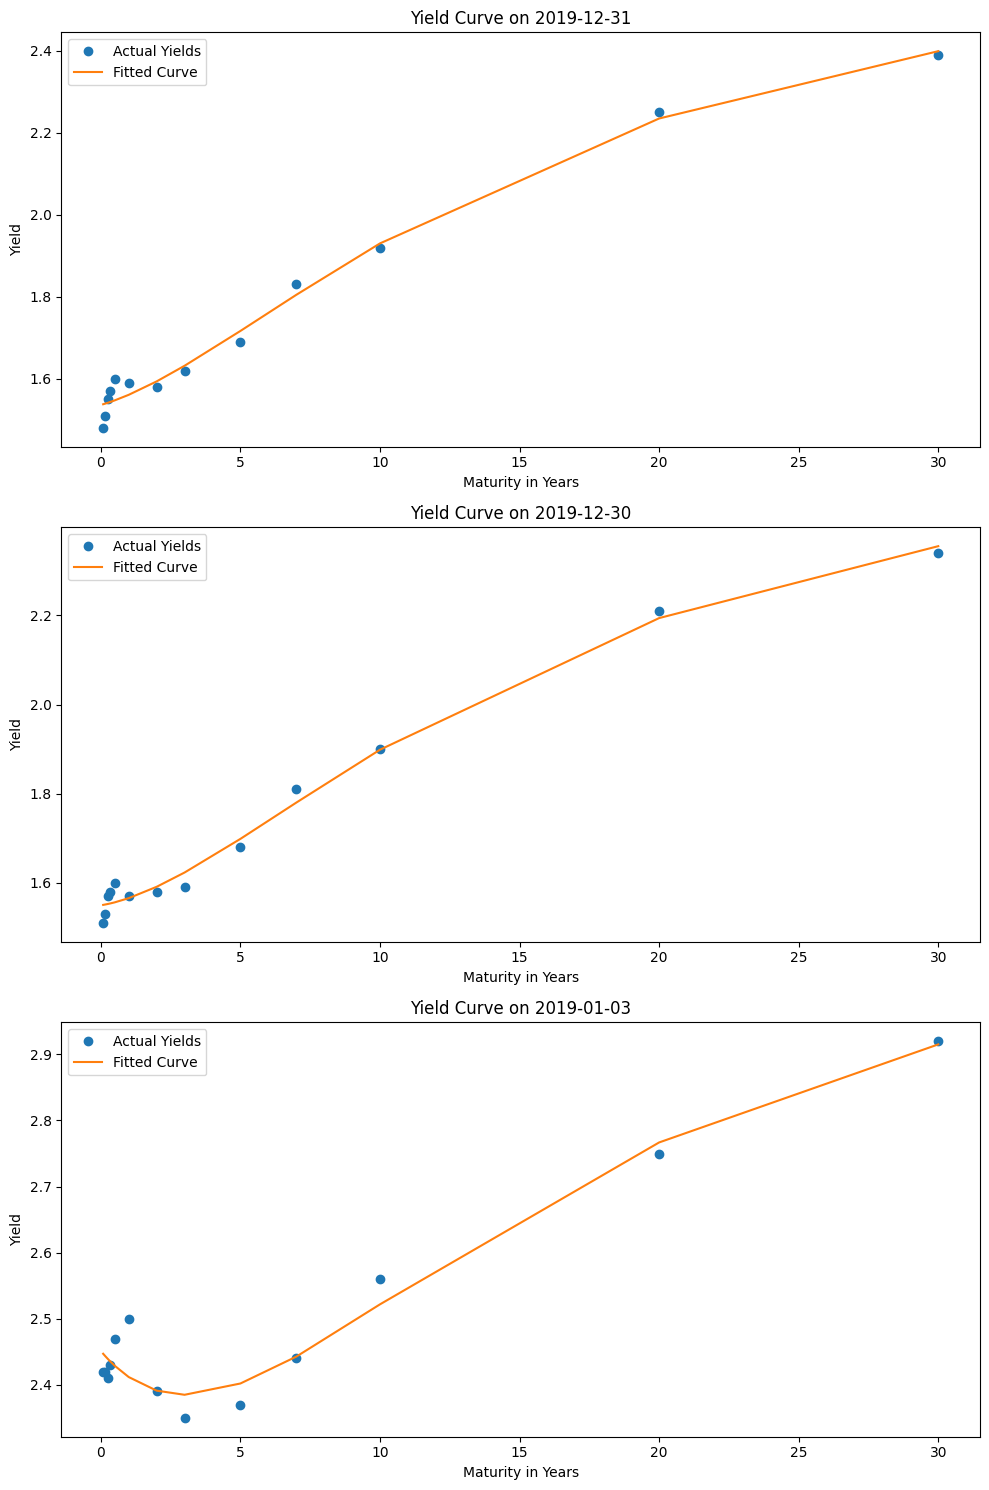

In [18]:
import matplotlib.pyplot as plt

# Function to calculate the Nelson-Siegel fitted yield curve
def calculate_fitted_curve(taus, params):
    return nelson_siegel(taus, *params)

# Reattempt plotting using correct and available dates
dates_to_plot = ['2019-12-31', '2019-12-30', '2019-01-03']
fig, ax = plt.subplots(len(dates_to_plot), 1, figsize=(10, 15))

for i, date in enumerate(dates_to_plot):
    actual_yields = data[data['Date'] == date].iloc[0, 1:].values
    params = parameters_NS_df.loc[date].values
    fitted_yields = calculate_fitted_curve(taus, params)

    ax[i].plot(list(tau.values()), actual_yields, 'o', label='Actual Yields')
    ax[i].plot(list(tau.values()), fitted_yields, label='Fitted Curve')
    ax[i].set_title(f'Yield Curve on {date}')
    ax[i].set_xlabel('Maturity in Years')
    ax[i].set_ylabel('Yield')
    ax[i].legend()

plt.tight_layout()
plt.show()



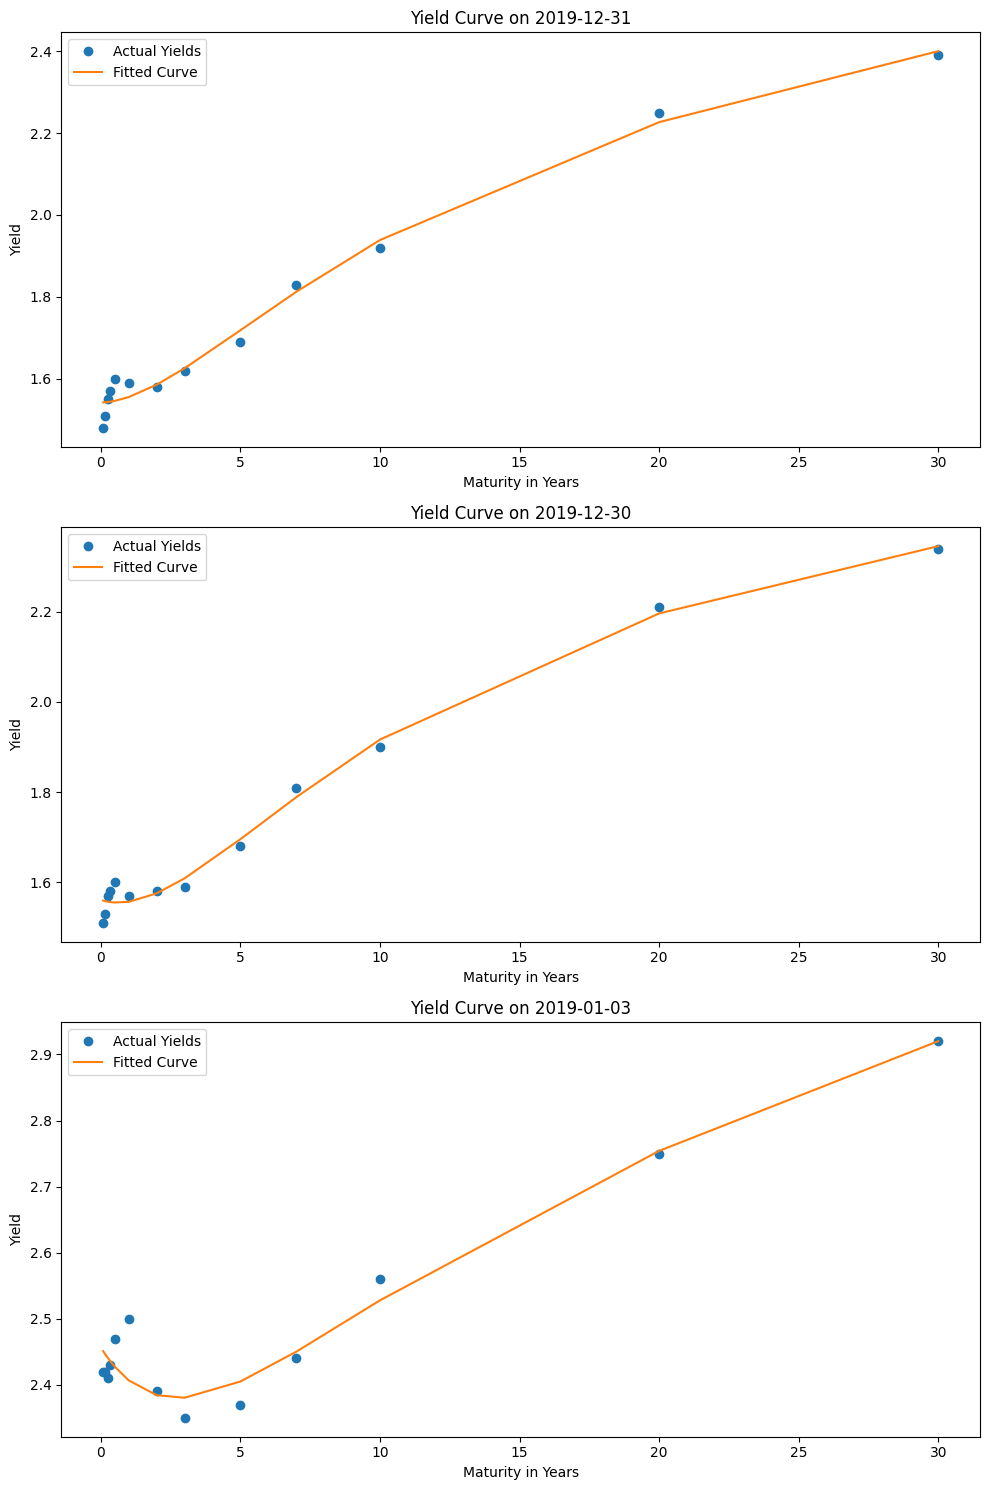

In [19]:
import matplotlib.pyplot as plt

# Function to calculate the Svensson fitted yield curve
def calculate_fitted_curve(taus, params):
    return svensson(taus, *params)

# Reattempt plotting using correct and available dates
dates_to_plot = ['2019-12-31', '2019-12-30', '2019-01-03']
fig, ax = plt.subplots(len(dates_to_plot), 1, figsize=(10, 15))

for i, date in enumerate(dates_to_plot):
    actual_yields = data[data['Date'] == date].iloc[0, 1:].values
    params = parameters_df_svensson.loc[date].values
    fitted_yields = calculate_fitted_curve(taus, params)

    ax[i].plot(list(tau.values()), actual_yields, 'o', label='Actual Yields')
    ax[i].plot(list(tau.values()), fitted_yields, label='Fitted Curve')
    ax[i].set_title(f'Yield Curve on {date}')
    ax[i].set_xlabel('Maturity in Years')
    ax[i].set_ylabel('Yield')
    ax[i].legend()

plt.tight_layout()
plt.show()

The model seems to capture the general trend of the yield curves quite well for some dates, showing a good fit across different maturities.
There are some discrepancies, particularly for short maturities, where the model might not perfectly align with the actual yields. This could be due to model specification or the dynamic nature of financial markets.

# Conditional covariance of the factor models for the yield curve

In [20]:
# from scipy.optimize import minimize
# from arch import arch_model

# # scaled_data = parameters_NS_df * 0.01

# # Assuming you have the parameters_df filled appropriately
# data = {
#     'beta1': parameters_NS_df['beta1'].tolist(),
#     'beta2': parameters_NS_df['beta2'].tolist(),
#     'beta3': parameters_NS_df['beta3'].tolist()
# }

# standardized_residuals = {}
# conditional_volatilities = {}

# # Fit GARCH model to each factor and store residuals and volatilities
# for key, series in data.items():
#     series = np.array(series)  # Ensure the data is in NumPy array format
#     garch_model = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
#     res = garch_model.fit(disp='off')
#     standardized_residuals[key] = res.resid / res.conditional_volatility
#     conditional_volatilities[key] = res.conditional_volatility

# # Convert to DataFrame for easier manipulation
# resid_df = pd.DataFrame(standardized_residuals)

# # Empirical correlation matrix of standardized residuals
# empirical_corr = resid_df.corr()

In [21]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

data = {
    'beta1': parameters_NS_df['beta1'].tolist(),
    'beta2': parameters_NS_df['beta2'].tolist(),
    'beta3': parameters_NS_df['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

# The final_dcc_cov_matrices is a list of conditional covariance matrices over time


In [22]:
final_dcc_cov_matrices[5]

array([[ 0.26055524,  0.06920501, -0.07080039],
       [ 0.06920501,  0.05163795, -0.060863  ],
       [-0.07080039, -0.060863  ,  1.69643694]])

CCC

In [23]:
def ccc_garch(residuals, volatilities):
    T = residuals.shape[0]
    num_assets = residuals.shape[1]
    # Empirical correlation matrix of residuals
    R_bar = np.cov(residuals.T)

    conditional_cov_matrices = []
    for t in range(T):
        D_t = np.diag(volatilities[t])
        # Conditional covariance matrix using constant correlation
        conditional_cov_matrix = D_t @ R_bar @ D_t
        conditional_cov_matrices.append(conditional_cov_matrix)

    return conditional_cov_matrices

# CCC
ccc_cov_matrices = ccc_garch(resid_df.values, D_t)
ccc_cov_matrices[0]

0.2344446100780665

In [24]:
ccc_cov_matrices = D_t @ np.cov(resid_df.values.T) @ D_t
ccc_cov_matrices[5]

array([[ 0.26143587,  0.06778386, -0.15979649],
       [ 0.06778386,  0.0511568 , -0.08768229],
       [-0.15979649, -0.08768229,  1.66196186]])

DECO

In [25]:
import numpy as np
import pandas as pd
from arch import arch_model

# Convert the dictionary of conditional volatilities into a DataFrame
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = np.array([np.diagflat(vol) for vol in vol_df.values])

# Generate a matrix of standardized residuals from the residuals DataFrame
std_resid = resid_df.values

# Initialize the equal weight correlation coefficient psi_equi
psi_equi = np.full(std_resid.shape[0], 0.5)

# Initialize the equal weight correlation matrix
Q_t = np.zeros((std_resid.shape[0], std_resid.shape[1], std_resid.shape[1]))

# Update the equal weight correlation matrix
for t in range(1, len(Q_t)):
    gamma = 0.01  # Update factor, might be estimated from data in practice
    psi_equi[t] = (1 - gamma) * psi_equi[t-1] + gamma * np.mean(std_resid[t-1]**2)

    # Update the equal weight correlation matrix according to the new psi_equi
    Q_t[t] = (1 - psi_equi[t]) * np.eye(std_resid.shape[1]) + psi_equi[t] * np.ones((std_resid.shape[1], std_resid.shape[1]))

# Calculate the conditional correlation matrix Psi_t at each time point
Psi_t = []
for t in range(len(Q_t)):
    D_inv = np.linalg.inv(D_t[t])  # Calculate the inverse of the D_t matrix
    Psi_t.append(D_inv @ Q_t[t] @ D_inv)

# The deco_cov_matrices contain the conditional covariance matrices at each time point
deco_cov_matrices = Psi_t


In [26]:
deco_cov_matrices[5]

array([[ 3.83795776,  4.94591393,  0.86290346],
       [ 4.94591393, 19.36560064,  1.93832947],
       [ 0.86290346,  1.93832947,  0.58947078]])

$\Sigma_t$

In [27]:

def calculate_predicted_yields(model, params_df, taus):
    predicted_yields = []
    for index, row in params_df.iterrows():
        predicted_yield = model(taus, *row.values)
        predicted_yields.append(predicted_yield)
    return np.array(predicted_yields)

def calculate_residuals(predicted_yields, actual_yields):
    residuals = actual_yields - predicted_yields
    return residuals


predicted_yields_ns = calculate_predicted_yields(nelson_siegel, parameters_NS_df, taus)


residuals_ns = calculate_residuals(predicted_yields_ns, yield_data)


residuals_ns_df = pd.DataFrame(residuals_ns, index=parameters_NS_df.index)

residuals_ns_df.columns = combined_data_sorted.columns[1:]

residuals_ns_df

1 Mo      2 Mo      3 Mo      4 Mo      6 Mo      1 Yr  \
Date                                                                     
2019-01-02  3.142392  3.132485  2.942508  2.952462  2.802174  2.329843   
2019-01-03  3.122964  3.106931  3.010736  2.984383  2.851214  2.408240   
2019-01-04  3.092558  3.072725  2.982820  2.962843  2.802684  2.330674   
2019-01-07  3.054367  3.043808  2.973195  2.962530  2.801046  2.345464   
2019-01-08  3.062713  3.040604  2.958478  2.966338  2.822014  2.318746   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -3.060210 -2.993256 -2.907307 -2.832346 -2.695315 -2.396093   
2023-12-26 -3.031795 -2.985010 -2.909227 -2.834427 -2.687704 -2.409308   
2023-12-27 -3.051015 -2.981304 -2.932656 -2.855051 -2.702894 -2.389530   
2023-12-28 -3.046985 -2.998342 -2.960738 -2.894152 -2.763963 -2.485960   
2023-12-29 -3.056966 -3.008641 -2.941357 -2.865093 -2.715553 -2.379543   

                2 Yr      3 Yr      5 Yr      7 Yr     10 Yr     20 Yr  \
Date                                                                     
2019-01-02  1.759620  1.523743  1.311468  1.302516  1.227964  1.355191   
2019-01-03  1.868810  1.635038  1.427962  1.397367  1.318211  1.373247   
2019-01-04  1.730836  1.485072  1.252459  1.232722  1.136649  1.249179   
2019-01-07  1.760073  1.530491  1.324004  1.293673  1.199935  1.326032   
2019-01-08  1.781266  1.483192  1.257545  1.254932  1.164647  1.315772   
...              ...       ...       ...       ...       ...       ...   
2023-12-22 -2.024687 -1.739517 -1.352769 -1.119670 -0.951560 -1.115187   
2023-12-26 -2.069162 -1.794825 -1.398827 -1.145689 -0.976762 -1.126518   
2023-12-27 -2.044751 -1.761661 -1.341245 -1.075618 -0.890814 -1.055913   
2023-12-28 -2.189768 -1.922914 -1.509815 -1.246915 -1.051481 -1.173832   
2023-12-29 -2.077470 -1.804818 -1.400033 -1.144982 -0.980020 -1.146013   

               30 Yr  
Date                  
2019-01-02  1.077632  
2019-01-03  1.064896  
2019-01-04  0.988778  
2019-01-07  1.065382  
2019-01-08  1.073753  
...              ...  
2023-12-22 -1.312083  
2023-12-26 -1.310745  
2023-12-27 -1.237550  
2023-12-28 -1.325135  
2023-12-29 -1.339510  

[1251 rows x 13 columns]

In [28]:
residuals = residuals_ns_df

garch_models = {}
garch_fits = {}
for column in residuals:

    garch_model = arch_model(residuals[column], vol='Garch', p=1, q=1)
    garch_models[column] = garch_model
    garch_fits[column] = garch_model.fit(disp='off')


for column, garch_fit in garch_fits.items():
    print(f'GARCH model fit for {column}:\n', garch_fit.summary())


conditional_volatility = {}
for column in residuals:
    conditional_volatility[column] = garch_fits[column].conditional_volatility


volatility_df = pd.DataFrame(conditional_volatility)
volatility_df

GARCH model fit for 1 Mo:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:                   1 Mo   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1379.14
Distribution:                  Normal   AIC:                           2766.29
Method:            Maximum Likelihood   BIC:                           2786.81
                                        No. Observations:                 1251
Date:                Wed, May 01 2024   Df Residuals:                     1250
Time:                        17:16:37   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0593  2.105e-0

1 Mo      2 Mo      3 Mo      4 Mo      6 Mo      1 Yr  \
Date                                                                     
2019-01-02  3.193717  3.114972  2.995445  2.970699  2.817760  2.483950   
2019-01-03  3.133406  3.102067  2.936037  2.957472  2.822663  2.434473   
2019-01-04  3.095281  3.082600  2.966416  2.977162  2.858338  2.502118   
2019-01-07  3.061360  3.055514  2.955630  2.966786  2.835430  2.436801   
2019-01-08  3.025117  3.027540  2.945712  2.963738  2.827270  2.444752   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  3.118146  3.014249  2.918124  2.860179  2.702120  2.310912   
2023-12-26  3.118887  3.011297  2.903999  2.839877  2.681697  2.297352   
2023-12-27  3.103631  3.005585  2.901204  2.835862  2.670156  2.308306   
2023-12-28  3.107298  3.000934  2.916865  2.849816  2.677188  2.291124   
2023-12-29  3.106732  3.007653  2.941201  2.882152  2.721935  2.378109   

                2 Yr      3 Yr      5 Yr      7 Yr     10 Yr     20 Yr  \
Date                                                                     
2019-01-02  2.067337  1.834270  1.642451  1.583535  1.512199  1.505105   
2019-01-03  1.917641  1.689190  1.349607  1.176424  0.955866  1.505667   
2019-01-04  2.026788  1.757494  1.391858  1.161502  1.045863  1.523674   
2019-01-07  1.888869  1.643941  1.253851  1.026541  0.864836  1.399947   
2019-01-08  1.918094  1.662609  1.289254  1.049402  0.927920  1.476586   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  1.890891  1.633019  1.399459  1.355563  1.211484  0.925620   
2023-12-26  1.865513  1.601714  1.384464  1.359379  1.224895  0.963257   
2023-12-27  1.909970  1.642827  1.420483  1.381342  1.250043  0.974544   
2023-12-28  1.885569  1.621765  1.378441  1.328429  1.164284  0.904222   
2023-12-29  2.030528  1.753880  1.513163  1.459480  1.324609  1.021681   

               30 Yr  
Date                  
2019-01-02  1.342713  
2019-01-03  1.149882  
2019-01-04  1.123807  
2019-01-07  1.051320  
2019-01-08  1.117711  
...              ...  
2023-12-22  1.196423  
2023-12-26  1.253408  
2023-12-27  1.255923  
2023-12-28  1.188056  
2023-12-29  1.265076  

[1251 rows x 13 columns]

In [29]:

def fit_garch_model(returns, model_type):
    if model_type == 'GARCH':
        model = arch_model(returns, mean='Constant', vol='Garch', p=1, q=1)
    elif model_type == 'GJR-GARCH':
        model = arch_model(returns, mean='Constant', vol='Garch', p=1, o=1, q=1)
    elif model_type == 'EGARCH':
        model = arch_model(returns, mean='Constant', vol='EGARCH', p=1, q=1)
    elif model_type == 'TGARCH':
        model = arch_model(returns, mean='Constant', vol='Garch', p=1, o=1, q=1, power=1.0)
    elif model_type == 'APARCH':
        model = arch_model(returns, mean='Constant', vol='APARCH', p=1, o=1, q=1)
    elif model_type == 'AGARCH':
        model = arch_model(returns, mean='Constant', vol='Garch', p=1, o=1, q=1)
    elif model_type == 'NAGARCH':
        model = arch_model(returns, mean='Constant', vol='Garch', p=1, o=1, q=1, power=2.0)
    else:
        raise ValueError("Invalid model type")

    return model.fit(update_freq=5, disp='off')

In [30]:

# AIC
aic_values = {
    'GARCH': [],
    'GJR-GARCH': [],
    'EGARCH': [],
    'TGARCH': [],
    'APARCH': [],
    'AGARCH': [],
    'NAGARCH': []
}

for column in residuals:
    returns = residuals[column]
    for model_type in aic_values.keys():
        fit_result = fit_garch_model(returns, model_type)
        aic_values[model_type].append(fit_result.aic)

aic_df = pd.DataFrame({k: [np.mean(v)] for k, v in aic_values.items()})

aic_df

/Users/jaden/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/jaden/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/jaden/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit reached
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


GARCH    GJR-GARCH       EGARCH       TGARCH       APARCH  \
0  3646.81732  3648.788031  3666.421099  3652.536877  3767.172623   

        AGARCH      NAGARCH  
0  3648.788031  3648.788031

GARCH is the best

In [31]:
"""residuals = residuals_ns_df

garch_models = {}
garch_fits = {}
for column in residuals:


    garch_model = arch_model(residuals[column], mean='Constant', vol='Garch', p=1, o=1, q=1, power=1.0)
    garch_models[column] = garch_model
    garch_fits[column] = garch_model.fit(disp='off')


for column, garch_fit in garch_fits.items():
    print(f'GARCH model fit for {column}:\n', garch_fit.summary())


conditional_volatility = {}
for column in residuals:
    conditional_volatility[column] = garch_fits[column].conditional_volatility

volatility_df = pd.DataFrame(conditional_volatility)
volatility_df"""

"residuals = residuals_ns_df\n\ngarch_models = {}\ngarch_fits = {}\nfor column in residuals:\n\n\n    garch_model = arch_model(residuals[column], mean='Constant', vol='Garch', p=1, o=1, q=1, power=1.0)\n    garch_models[column] = garch_model\n    garch_fits[column] = garch_model.fit(disp='off')\n\n\nfor column, garch_fit in garch_fits.items():\n    print(f'GARCH model fit for {column}:\n', garch_fit.summary())\n\n\nconditional_volatility = {}\nfor column in residuals:\n    conditional_volatility[column] = garch_fits[column].conditional_volatility\n\nvolatility_df = pd.DataFrame(conditional_volatility)\nvolatility_df"

# Expected bond returns and the conditional covariance matrix of bond returns

In [32]:
parameters_NS_df

beta1     beta2     beta3
Date                                    
2019-01-02  3.201888 -0.744117 -0.768180
2019-01-03  3.267341 -0.816172 -1.322217
2019-01-04  3.217487 -0.759802 -0.793439
2019-01-07  3.206750 -0.731619 -0.674695
2019-01-08  3.161927 -0.686732 -0.436626
...              ...       ...       ...
2023-12-22  5.145538  0.362652 -5.457170
2023-12-26  5.127654  0.371946 -5.426641
2023-12-27  5.090979  0.410829 -5.750155
2023-12-28  5.092359  0.424325 -5.603854
2023-12-29  5.184333  0.322018 -5.668512

[1251 rows x 3 columns]

In [33]:
parameters_df_svensson

beta1     beta2     beta3      beta4
Date                                               
2019-01-02  3.797239 -1.349079 -0.480927  -2.299648
2019-01-03  3.590750 -1.134311 -1.047358  -1.604734
2019-01-04  3.771428 -1.321521 -0.529128  -2.171128
2019-01-07  3.719136 -1.251873 -0.455924  -1.990247
2019-01-08  3.854057 -1.395115 -0.174709  -2.494857
...              ...       ...       ...        ...
2023-12-22  1.758030  3.909064 -5.484940   9.184146
2023-12-26  1.731320  3.927337 -5.467469   9.227083
2023-12-27  1.585346  4.082241 -5.741039   9.473461
2023-12-28  1.663487  4.014809 -5.589559   9.272286
2023-12-29  1.451901  4.226756 -5.834433  10.244121

[1251 rows x 4 columns]

In [34]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import VAR

ar_predictions = []
var_predictions = []
df = parameters_NS_df.copy()

for column in df.columns:
    ar_predictions_col = []
    for end in range(4, len(df)):
        model_ar = AutoReg(df[column].iloc[:end], lags=1)
        results_ar = model_ar.fit()
        pred = results_ar.predict(end, end)
        ar_predictions_col.append(pred.iloc[0])
    ar_predictions.append(ar_predictions_col)

for end in range(4, len(df)):
    model_var = VAR(df.iloc[:end])
    results_var = model_var.fit(1)
    pred = results_var.forecast(results_var.endog, steps=1)
    var_predictions.append(pred[0])

# DataFrame
ar_predictions_df = pd.DataFrame(ar_predictions).T  # AR
ar_predictions_df.columns = [col for col in df.columns]#'AR_' +

var_predictions_df = pd.DataFrame(var_predictions, columns=[col for col in df.columns])#'VAR_' +

print("AR model predictions:")
print(ar_predictions_df)
print("\nVAR model predictions:")
print(var_predictions_df)


/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment 

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, call

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date i

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

AR model predictions:
         beta1     beta2     beta3
0     3.242130 -0.787607 -1.050436
1     3.215293 -0.724597 -0.764682
2     3.214120 -0.751239 -0.668485
3     3.226165 -0.770532 -0.691090
4     3.254577 -0.792018 -0.738057
...        ...       ...       ...
1242  5.099041  0.410932 -5.371474
1243  5.145750  0.361575 -5.444853
1244  5.127805  0.370876 -5.414374
1245  5.091008  0.409788 -5.737868
1246  5.092393  0.423296 -5.591597

[1247 rows x 3 columns]

VAR model predictions:
         beta1     beta2     beta3
0     3.299193 -0.839853 -1.495710
1     3.266827 -0.825024 -1.518497
2     3.116387 -0.605703 -0.376898
3     3.253026 -0.775432 -0.169965
4     3.259727 -0.793870 -0.612919
...        ...       ...       ...
1242  5.096369  0.413854 -5.394679
1243  5.142523  0.364869 -5.468122
1244  5.124748  0.374039 -5.437435
1245  5.087879  0.411736 -5.759277
1246  5.089569  0.425570 -5.613628

[1247 rows x 3 columns]


/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/jaden/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

In [35]:
ar_predictions_df

beta1     beta2     beta3
0     3.242130 -0.787607 -1.050436
1     3.215293 -0.724597 -0.764682
2     3.214120 -0.751239 -0.668485
3     3.226165 -0.770532 -0.691090
4     3.254577 -0.792018 -0.738057
...        ...       ...       ...
1242  5.099041  0.410932 -5.371474
1243  5.145750  0.361575 -5.444853
1244  5.127805  0.370876 -5.414374
1245  5.091008  0.409788 -5.737868
1246  5.092393  0.423296 -5.591597

[1247 rows x 3 columns]

In [36]:
var_predictions_df

beta1     beta2     beta3
0     3.299193 -0.839853 -1.495710
1     3.266827 -0.825024 -1.518497
2     3.116387 -0.605703 -0.376898
3     3.253026 -0.775432 -0.169965
4     3.259727 -0.793870 -0.612919
...        ...       ...       ...
1242  5.096369  0.413854 -5.394679
1243  5.142523  0.364869 -5.468122
1244  5.124748  0.374039 -5.437435
1245  5.087879  0.411736 -5.759277
1246  5.089569  0.425570 -5.613628

[1247 rows x 3 columns]

In [37]:
import numpy as np
import pandas as pd

tau_values = np.array(list(tau.values()))

# Calculate expected yields for each day using the fitted Nelson-Siegel parameters
def calculate_yields(tau_values, params):
    beta1, beta2, beta3 = params
    return nelson_siegel(tau_values, beta1, beta2, beta3)

# Use the expected yields to calculate expected bond prices and log returns
expected_prices = {}
expected_log_returns = {}

# Calculate for each date
for date, params in parameters_NS_df.iterrows():
    if not np.isnan(params).any():
        y_t1 = calculate_yields(tau_values, params)
        P_t1 = np.exp(-tau_values * y_t1)  # Bond prices from yields
        if date != parameters_NS_df.index[0]:
            # Calculate log returns comparing to previous day prices
            P_t0 = expected_prices[parameters_NS_df.index[parameters_NS_df.index.get_loc(date) - 1]]
            log_returns = np.log(P_t1 / P_t0)
            expected_log_returns[date] = log_returns

        expected_prices[date] = P_t1

# Convert log returns to DataFrame
log_returns_df = pd.DataFrame.from_dict(expected_log_returns, orient='index', columns=[f"tau_{tau}" for tau in tau_values])

# Calculate the conditional covariance matrix of log returns
covariance_matrix = log_returns_df.cov()

print("Expected Bond Log-Returns:")
print(log_returns_df.head())
print("Conditional Covariance Matrix of Bond Returns:")
print(covariance_matrix)


Expected Bond Log-Returns:
            tau_0.08333333333333333  tau_0.16666666666666666  tau_0.25  \
2019-01-03                 0.000881                 0.002408  0.004557   
2019-01-04                -0.000867                -0.002368 -0.004479   
2019-01-07                -0.001516                -0.003153 -0.004906   
2019-01-08                -0.000138                -0.000534 -0.001179   
2019-01-09                 0.000954                 0.001929  0.002924   

            tau_0.3333333333333333   tau_0.5   tau_1.0   tau_2.0   tau_3.0  \
2019-01-03                0.007307  0.014520  0.048397  0.158381  0.303884   
2019-01-04               -0.007180 -0.014265 -0.047566 -0.155948 -0.299898   
2019-01-07               -0.006771 -0.010819 -0.025210 -0.061527 -0.103743   
2019-01-08               -0.002064 -0.004516 -0.016719 -0.057613 -0.111898   
2019-01-09                0.003937  0.006005  0.012410  0.024896  0.035065   

             tau_5.0   tau_7.0  tau_10.0  tau_20.0  tau_30.

In [38]:
def expected_log_return(predictions_df):
    # Use the expected yields to calculate expected bond prices and log returns
    expected_prices = {}
    expected_log_returns = {}

    # Calculate for each date
    for date, params in predictions_df.iterrows():
        if not np.isnan(params).any():
            y_t1 = calculate_yields(tau_values, params)
            P_t1 = np.exp(-tau_values * y_t1)  # Bond prices from yields
            if date != predictions_df.index[0]:
                # Calculate log returns comparing to previous day prices
                P_t0 = expected_prices[predictions_df.index[predictions_df.index.get_loc(date) - 1]]
                log_returns = np.log(P_t1 / P_t0)
                expected_log_returns[date] = log_returns

            expected_prices[date] = P_t1

    # Convert log returns to DataFrame
    log_returns_df = pd.DataFrame.from_dict(expected_log_returns, orient='index', columns=[f"tau_{tau}" for tau in tau_values])

    # Calculate the conditional covariance matrix of log returns
    covariance_matrix = log_returns_df.cov()

    print("Expected Bond Log-Returns:")
    print(log_returns_df.head())
    print("Conditional Covariance Matrix of Bond Returns:")
    print(covariance_matrix)

    return log_returns_df

log_returns_df_ar = expected_log_return(ar_predictions_df)
log_returns_df_var = expected_log_return(var_predictions_df)

Expected Bond Log-Returns:
   tau_0.08333333333333333  tau_0.16666666666666666  tau_0.25  \
1                -0.003167                -0.006632 -0.010383   
2                 0.002234                 0.004301  0.006209   
3                 0.000606                 0.001216  0.001830   
4                -0.000560                -0.001086 -0.001580   
5                -0.001243                -0.002477 -0.003703   

   tau_0.3333333333333333   tau_0.5   tau_1.0   tau_2.0   tau_3.0   tau_5.0  \
1               -0.014410 -0.023248 -0.055309 -0.138135 -0.235805 -0.442505   
2                0.007960  0.011013  0.016892  0.016658  0.004991 -0.037023   
3                0.002447  0.003686  0.007422  0.014670  0.021167  0.030619   
4               -0.002043 -0.002884 -0.004824 -0.006953 -0.008140 -0.012101   
5               -0.004922 -0.007343 -0.014536 -0.029175 -0.045016 -0.082803   

    tau_7.0  tau_10.0  tau_20.0  tau_30.0  
1 -0.632678 -0.852724 -1.070466 -0.913139  
2 -0.087746 -0.1587

In [39]:
log_returns_df_ar

tau_0.08333333333333333  tau_0.16666666666666666  tau_0.25  \
1                   -0.003167                -0.006632 -0.010383   
2                    0.002234                 0.004301  0.006209   
3                    0.000606                 0.001216  0.001830   
4                   -0.000560                -0.001086 -0.001580   
5                   -0.001243                -0.002477 -0.003703   
...                       ...                      ...       ...   
1242                -0.000096                -0.000187 -0.000276   
1243                 0.000237                 0.000505  0.000802   
1244                 0.000706                 0.001383  0.002034   
1245                 0.000073                 0.000633  0.001666   
1246                -0.001332                -0.002842 -0.004524   

      tau_0.3333333333333333   tau_0.5   tau_1.0   tau_2.0   tau_3.0  \
1                  -0.014410 -0.023248 -0.055309 -0.138135 -0.235805   
2                   0.007960  0.011013  0.016892  0.016658  0.004991   
3                   0.002447  0.003686  0.007422  0.014670  0.021167   
4                  -0.002043 -0.002884 -0.004824 -0.006953 -0.008140   
5                  -0.004922 -0.007343 -0.014536 -0.029175 -0.045016   
...                      ...       ...       ...       ...       ...   
1242               -0.000365 -0.000546 -0.001227 -0.004076 -0.010210   
1243                0.001126  0.001847  0.004454  0.010525  0.015944   
1244                0.002658  0.003834  0.006844  0.011178  0.014275   
1245                0.003157  0.007452  0.029873  0.109011  0.219781   
1246               -0.006372 -0.010542 -0.026443 -0.070052 -0.123781   

       tau_5.0   tau_7.0  tau_10.0  tau_20.0  tau_30.0  
1    -0.442505 -0.632678 -0.852724 -1.070466 -0.913139  
2    -0.037023 -0.087746 -0.158784 -0.282696 -0.304553  
3     0.030619  0.034495  0.030096 -0.043527 -0.154059  
4    -0.012101 -0.022098 -0.051744 -0.249458 -0.514450  
5    -0.082803 -0.130445 -0.220219 -0.626182 -1.099331  
...        ...       ...       ...       ...       ...  
1242 -0.035873 -0.081383 -0.184760 -0.727037 -1.391196  
1243  0.019400  0.008717 -0.035775 -0.358631 -0.794587  
1244  0.020059  0.028375  0.048717  0.174812  0.342218  
1245  0.488404  0.771199  1.160513  2.014298  2.499252  
1246 -0.242871 -0.359093 -0.506667 -0.758379 -0.827585  

[1246 rows x 13 columns]

In [40]:
log_returns_df_var

tau_0.08333333333333333  tau_0.16666666666666666  tau_0.25  \
1                    0.001487                 0.003025  0.004613   
2                   -0.006373                -0.013979 -0.022774   
3                    0.002498                 0.004487  0.005978   
4                    0.001270                 0.003109  0.005499   
5                   -0.001456                -0.003320 -0.005578   
...                       ...                      ...       ...   
1242                -0.000088                -0.000171 -0.000250   
1243                 0.000253                 0.000537  0.000851   
1244                 0.000702                 0.001376  0.002022   
1245                 0.000178                 0.000840  0.001971   
1246                -0.001384                -0.002945 -0.004677   

      tau_0.3333333333333333   tau_0.5   tau_1.0   tau_2.0   tau_3.0  \
1                   0.006249  0.009660  0.020922  0.047301  0.077533   
2                  -0.032711 -0.055843 -0.148363 -0.411987 -0.739268   
3                   0.006986  0.007599 -0.000935 -0.057180 -0.153142   
4                   0.008420  0.015785  0.048820  0.153315  0.291477   
5                  -0.008215 -0.014576 -0.041445 -0.122339 -0.226645   
...                      ...       ...       ...       ...       ...   
1242               -0.000327 -0.000481 -0.001055 -0.003583 -0.009280   
1243                0.001192  0.001949  0.004678  0.011042  0.016809   
1244                0.002642  0.003806  0.006775  0.010990  0.013934   
1245                0.003555  0.008027  0.030902  0.110650  0.221732   
1246               -0.006573 -0.010835 -0.026990 -0.071009 -0.125053   

       tau_5.0   tau_7.0  tau_10.0  tau_20.0  tau_30.0  
1     0.145068  0.217206  0.327226  0.678035  1.008978  
2    -1.449275 -2.102924 -2.834313 -3.252990 -2.189643  
3    -0.420145 -0.739411 -1.247173 -2.839575 -4.269319  
4     0.610005  0.926548  1.328267  1.968431  2.067278  
5    -0.462829 -0.693785 -0.981281 -1.402547 -1.413842  
...        ...       ...       ...       ...       ...  
1242 -0.033831 -0.078028 -0.179246 -0.713947 -1.370561  
1243  0.021085  0.011334 -0.031639 -0.349057 -0.779463  
1244  0.019348  0.027254  0.046966  0.171107  0.336743  
1245  0.490423  0.772910  1.161582  2.014203  2.499363  
1246 -0.244607 -0.361191 -0.509285 -0.763263 -0.835317  

[1246 rows x 13 columns]

In [41]:
#A
lambda_param = 0.2

def create_factor_loading_matrix(lambda_param, tau):
    n = len(tau)
    Lambda = np.zeros((n, 3))  # Initialize an N x 3 matrix

    for i in range(n):
        # Calculate each element of the matrix according to the provided formula
        Lambda[i, 0] = 1
        Lambda[i, 1] = (1 - np.exp(-lambda_param * tau[i])) / (lambda_param * tau[i])
        Lambda[i, 2] = Lambda[i, 1] - np.exp(-lambda_param * tau[i])

    return Lambda

# Generate the factor loading matrix
Lambda_matrix = create_factor_loading_matrix(lambda_param, tau_values)

# Display the matrix
#print(Lambda_matrix)

A = np.array(Lambda_matrix)

A

array([[1.        , 0.99171277, 0.00824132],
       [1.        , 0.98351699, 0.01630089],
       [1.        , 0.97541151, 0.02418209],
       [1.        , 0.96739522, 0.03188824],
       [1.        , 0.95162582, 0.0467884 ],
       [1.        , 0.90634623, 0.08761548],
       [1.        , 0.82419988, 0.15387984],
       [1.        , 0.75198061, 0.20316897],
       [1.        , 0.63212056, 0.26424112],
       [1.        , 0.53814503, 0.29154806],
       [1.        , 0.43233236, 0.29699708],
       [1.        , 0.24542109, 0.22710545],
       [1.        , 0.16625354, 0.16377479]])

In [42]:
covariance_matrix_set = []

for i in range(len(final_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

covariance_matrix_set[0]

0         1         2         3         4         5         6   \
0   0.000236  0.000028  0.000041  0.000054  0.000080  0.000154  0.000287   
1   0.000028  0.000920  0.000081  0.000108  0.000160  0.000307  0.000571   
2   0.000041  0.000081  0.001993  0.000161  0.000238  0.000458  0.000852   
3   0.000054  0.000108  0.000161  0.003514  0.000315  0.000606  0.001130   
4   0.000080  0.000160  0.000238  0.000315  0.007511  0.000898  0.001675   
5   0.000154  0.000307  0.000458  0.000606  0.000898  0.026572  0.003240   
6   0.000287  0.000571  0.000852  0.001130  0.001675  0.003240  0.088780   
7   0.000404  0.000803  0.001198  0.001589  0.002358  0.004571  0.008626   
8   0.000601  0.001197  0.001787  0.002371  0.003524  0.006859  0.013034   
9   0.000769  0.001532  0.002289  0.003039  0.004520  0.008821  0.016845   
10  0.000993  0.001978  0.002956  0.003926  0.005845  0.011435  0.021931   
11  0.001676  0.003340  0.004991  0.006630  0.009872  0.019323  0.037112   
12  0.002359  0.004699  0.007019  0.009321  0.013870  0.027098  0.051878   

          7         8         9         10        11         12  
0   0.000404  0.000601  0.000769  0.000993  0.001676   0.002359  
1   0.000803  0.001197  0.001532  0.001978  0.003340   0.004699  
2   0.001198  0.001787  0.002289  0.002956  0.004991   0.007019  
3   0.001589  0.002371  0.003039  0.003926  0.006630   0.009321  
4   0.002358  0.003524  0.004520  0.005845  0.009872   0.013870  
5   0.004571  0.006859  0.008821  0.011435  0.019323   0.027098  
6   0.008626  0.013034  0.016845  0.021931  0.037112   0.051878  
7   0.177356  0.018655  0.024211  0.031641  0.053626   0.074783  
8   0.018655  0.439243  0.037409  0.049188  0.083655   0.116322  
9   0.024211  0.037409  0.825046  0.064872  0.110738   0.153832  
10  0.031641  0.049188  0.064872  1.598278  0.147762   0.205446  
11  0.053626  0.083655  0.110738  0.147762  6.277984   0.361530  
12  0.074783  0.116322  0.153832  0.205446  0.361530  12.596116

# VAR computation

In [43]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Assume log_returns_df and covariance_matrix are already defined
# Number of bonds
N = log_returns_df.shape[1]

# Portfolio weights (equally weighted)
weights = np.ones(N) / N

# Calculate portfolio mean and variance
portfolio_mean = log_returns_df.mean(axis=0).dot(weights)
portfolio_variance = weights.dot(covariance_matrix).dot(weights.T)
portfolio_std_dev = np.sqrt(portfolio_variance)

# Confidence levels and their quantiles for VaR calculation
confidence_levels = [0.01, 0.025, 0.05]  # 1%, 2.5%, and 5%
quantiles = norm.ppf(confidence_levels)

# Calculate VaR for each confidence level
VaRs = portfolio_mean + quantiles * portfolio_std_dev

# Output the results
VaR_results = pd.DataFrame({
    'Confidence Level (%)': [level * 100 for level in confidence_levels],
    'VaR': VaRs
})

print(VaR_results)




   Confidence Level (%)       VaR
0                   1.0 -0.915408
1                   2.5 -0.772243
2                   5.0 -0.649114


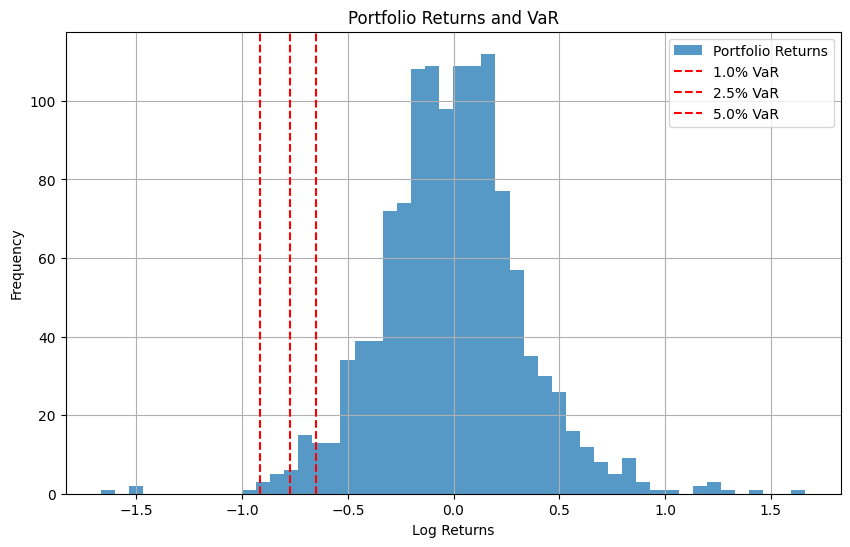

In [44]:
# Calculate total portfolio log returns for plotting
total_portfolio_returns = log_returns_df.dot(weights)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(total_portfolio_returns, bins=50, alpha=0.75, label='Portfolio Returns')

for conf_level, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=VaR, color='r', linestyle='--', label=f'{conf_level*100}% VaR')

plt.title('Portfolio Returns and VaR')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Backtesting for VaR

In [45]:
import numpy as np
import pandas as pd
from scipy.stats import chi2, norm

# Assuming 'log_returns_df', 'VaR_results' are already defined, and 'VaR_results' has VaR estimates
# Merge log returns with VaR estimates, assuming dates align properly
portfolio_returns = log_returns_df.sum(axis=1)/N  # Summing because it's equally weighted returns
VaR_threshold = VaR_results['VaR'].iloc[0]  # Using the first row assuming it's a constant VaR for simplification

# Create Hit Sequence
hits = portfolio_returns < VaR_threshold
hit_sequence = hits.astype(int)  # 1 where there's a VaR breach, 0 otherwise

# Unconditional Coverage Test
n_breaches = hit_sequence.sum()
n_periods = len(hit_sequence)
expected_breaches = n_periods * 0.01  # For a 1% VaR
observed_frequency = n_breaches / n_periods

# Using a Binomial Test to test if observed breaches significantly differ from expected
p_value_uc = 1 - chi2.cdf(-2 * (np.log((1 - 0.01) ** (n_periods - n_breaches) * 0.01 ** n_breaches) -
                                 np.log((1 - observed_frequency) ** (n_periods - n_breaches) * observed_frequency ** n_breaches)), 1)

# Independence Test
# We'll use the autocorrelation of the hit sequence at lag 1
lag1_acf = hit_sequence.autocorr(lag=1)
independence_p_value = 1 - chi2.cdf(n_periods * (lag1_acf ** 2), 1)

print("Unconditional Coverage Test p-value:", p_value_uc)
print("Independence Test p-value:", independence_p_value)
print("Number of breaches:", n_breaches)
print("Expected number of breaches:", expected_breaches)


Unconditional Coverage Test p-value: 0.004827970586752328
Independence Test p-value: 0.9095616647630507
Number of breaches: 4
Expected number of breaches: 12.5


In [46]:
portfolio_returns

2019-01-03    0.469097
2019-01-04   -0.498702
2019-01-07   -0.147324
2019-01-08   -0.128853
2019-01-09   -0.100399
                ...   
2023-12-22   -0.085711
2023-12-26    0.050118
2023-12-27    0.561291
2023-12-28   -0.226180
2023-12-29   -0.263116
Length: 1250, dtype: float64

In [47]:
total_portfolio_returns

2019-01-03    0.469097
2019-01-04   -0.498702
2019-01-07   -0.147324
2019-01-08   -0.128853
2019-01-09   -0.100399
                ...   
2023-12-22   -0.085711
2023-12-26    0.050118
2023-12-27    0.561291
2023-12-28   -0.226180
2023-12-29   -0.263116
Length: 1250, dtype: float64

# Results

## 1% value−at−risk: NS/AR/DCC−GARCH

In [48]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

# Assuming parameters_df is filled correctly
data = {
    'beta1': parameters_NS_df['beta1'].tolist(),
    'beta2': parameters_NS_df['beta2'].tolist(),
    'beta3': parameters_NS_df['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_NS_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

covariance_matrix_set = []
for i in range(len(final_NS_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

Value at Risk (VaR) for the portfolio at different confidence levels:
1.0% VaR: 1      -1.247372
2      -0.970599
3      -0.912813
4      -0.976551
5      -1.083434
          ...   
1242   -1.096498
1243   -0.995591
1244   -0.858473
1245   -0.347071
1246   -1.135210
Length: 1246, dtype: float64
2.5% VaR: 1      -1.104208
2      -0.827435
3      -0.769649
4      -0.833387
5      -0.940269
          ...   
1242   -0.953334
1243   -0.852426
1244   -0.715309
1245   -0.203907
1246   -0.992045
Length: 1246, dtype: float64
5.0% VaR: 1      -0.981079
2      -0.704306
3      -0.646520
4      -0.710257
5      -0.817140
          ...   
1242   -0.830204
1243   -0.729297
1244   -0.592180
1245   -0.080778
1246   -0.868916
Length: 1246, dtype: float64


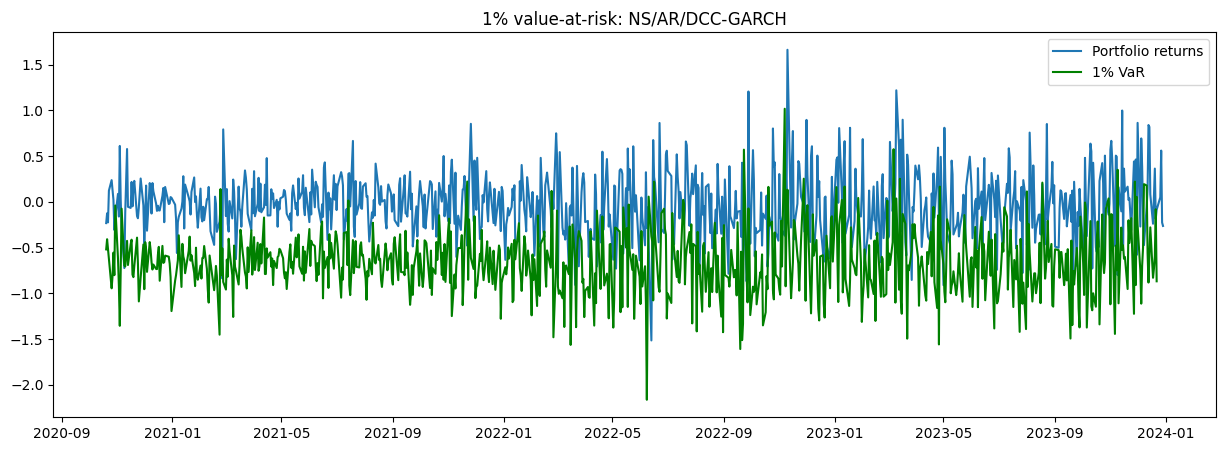

Exceeding Rate:0.07142857142857142


In [49]:
from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_ar.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

print("Value at Risk (VaR) for the portfolio at different confidence levels:")
for var_q, VaR in VaR_results.items():
    print(f"{var_q*100}% VaR: {VaR}")

VaR.index = portfolio_returns.index[:-4]

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(portfolio_returns[450:], label='Portfolio returns')
plt.plot(VaR[450:], label='1% VaR', color='green')
plt.title('1% value-at-risk: NS/AR/DCC-GARCH')
plt.legend()
plt.show()

cnt = 0
for i  in range(len(VaR)):
    if VaR[i] >= portfolio_returns[i]:
        cnt += 1

print(f"Exceeding Rate:{cnt/len(VaR)}")


## 1% value−at−risk: NS/VAR/DCC−GARCH

In [50]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

# Assuming parameters_df is filled correctly
data = {
    'beta1': parameters_NS_df['beta1'].tolist(),
    'beta2': parameters_NS_df['beta2'].tolist(),
    'beta3': parameters_NS_df['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_NS_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

covariance_matrix_set = []
for i in range(len(final_NS_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

Value at Risk (VaR) for the portfolio at different confidence levels:
1.0% VaR: 1      -0.713072
2      -1.929053
3      -1.655121
4      -0.337617
5      -1.322700
          ...   
1242   -1.092930
1243   -0.992898
1244   -0.859506
1245   -0.346223
1246   -1.136951
Length: 1246, dtype: float64
2.5% VaR: 1      -0.569908
2      -1.785888
3      -1.511957
4      -0.194452
5      -1.179536
          ...   
1242   -0.949766
1243   -0.849734
1244   -0.716342
1245   -0.203059
1246   -0.993787
Length: 1246, dtype: float64
5.0% VaR: 1      -0.446779
2      -1.662759
3      -1.388828
4      -0.071323
5      -1.056407
          ...   
1242   -0.826637
1243   -0.726604
1244   -0.593213
1245   -0.079930
1246   -0.870658
Length: 1246, dtype: float64


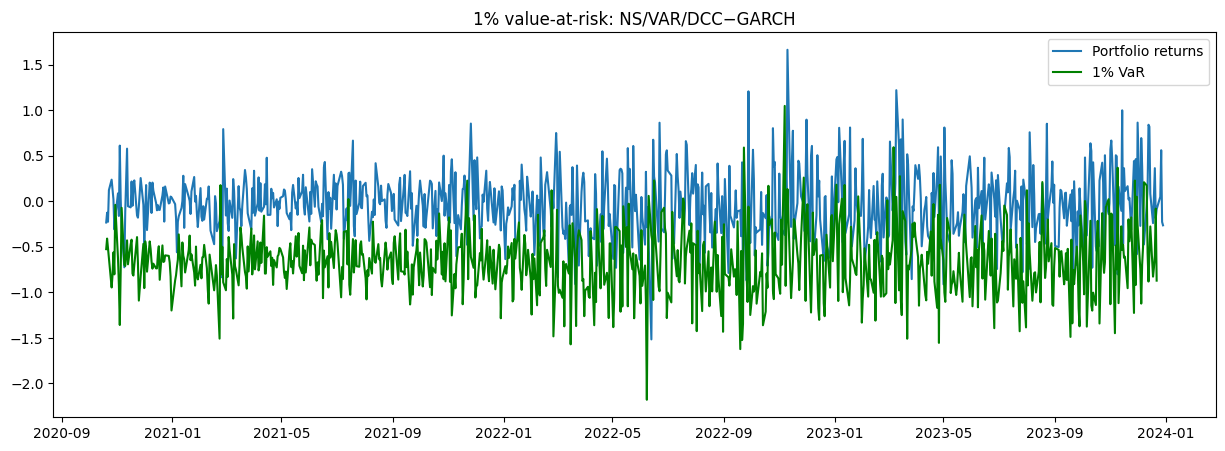

Exceeding Rate:0.07463884430176565


In [51]:
from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_var.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

print("Value at Risk (VaR) for the portfolio at different confidence levels:")
for var_q, VaR in VaR_results.items():
    print(f"{var_q*100}% VaR: {VaR}")

VaR.index = portfolio_returns.index[:-4]

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(portfolio_returns [450:], label='Portfolio returns')
plt.plot(VaR[450:], label='1% VaR', color='green')
plt.title('1% value-at-risk: NS/VAR/DCC−GARCH')
plt.legend()
plt.show()

cnt = 0
for i  in range(len(VaR)):
    if VaR[i] >= portfolio_returns[i]:
        cnt += 1

print(f"Exceeding Rate:{cnt/len(VaR)}")

## 1% value−at−risk: Svensson/AR/DCC−GARCH

In [52]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

# Assuming parameters_df is filled correctly
data = {
    'beta1': parameters_df_svensson['beta1'].tolist(),
    'beta2': parameters_df_svensson['beta2'].tolist(),
    'beta3': parameters_df_svensson['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_SV_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

covariance_matrix_set = []
for i in range(len(final_SV_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_SV_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

Value at Risk (VaR) for the portfolio at different confidence levels:
1.0% VaR: 1      -1.649538
2      -1.372764
3      -1.314978
4      -1.378716
5      -1.485599
          ...   
1242   -1.498663
1243   -1.397756
1244   -1.260638
1245   -0.749237
1246   -1.537375
Length: 1246, dtype: float64
2.5% VaR: 1      -1.443035
2      -1.166262
3      -1.108476
4      -1.172214
5      -1.279096
          ...   
1242   -1.292161
1243   -1.191253
1244   -1.054136
1245   -0.542734
1246   -1.330872
Length: 1246, dtype: float64
5.0% VaR: 1      -1.265432
2      -0.988658
3      -0.930872
4      -0.994610
5      -1.101493
          ...   
1242   -1.114557
1243   -1.013650
1244   -0.876532
1245   -0.365131
1246   -1.153269
Length: 1246, dtype: float64


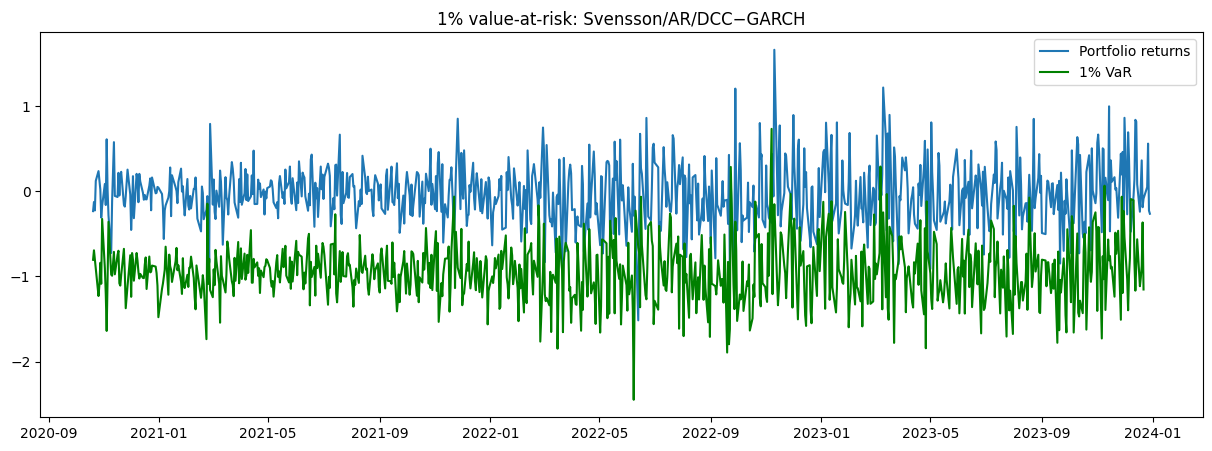

Exceeding Rate:0.024879614767255216


In [53]:
from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_ar.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

print("Value at Risk (VaR) for the portfolio at different confidence levels:")
for var_q, VaR in VaR_results.items():
    print(f"{var_q*100}% VaR: {VaR}")

VaR.index = portfolio_returns.index[:-4]


# Plot the results
plt.figure(figsize=(15,5))
plt.plot(portfolio_returns[450:], label='Portfolio returns')
plt.plot(VaR[450:], label='1% VaR', color='green')
plt.title('1% value-at-risk: Svensson/AR/DCC−GARCH')
plt.legend()
plt.show()

cnt = 0
for i  in range(len(VaR)):
    if VaR[i] >= portfolio_returns[i]:
        cnt += 1

print(f"Exceeding Rate:{cnt/len(VaR)}")

## 1% value−at−risk: Svensson/VAR/DCC−GARCH

In [54]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

# Assuming parameters_df is filled correctly
data = {
    'beta1': parameters_df_svensson['beta1'].tolist(),
    'beta2': parameters_df_svensson['beta2'].tolist(),
    'beta3': parameters_df_svensson['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_SV_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

covariance_matrix_set = []
for i in range(len(final_SV_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_SV_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

Value at Risk (VaR) for the portfolio at different confidence levels:
1.0% VaR: 1      -1.115237
2      -2.331218
3      -2.057286
4      -0.739782
5      -1.724865
          ...   
1242   -1.495095
1243   -1.395063
1244   -1.261671
1245   -0.748389
1246   -1.539117
Length: 1246, dtype: float64
2.5% VaR: 1      -0.908735
2      -2.124715
3      -1.850784
4      -0.533279
5      -1.518363
          ...   
1242   -1.288593
1243   -1.188560
1244   -1.055169
1245   -0.541886
1246   -1.332614
Length: 1246, dtype: float64
5.0% VaR: 1      -0.731131
2      -1.947112
3      -1.673180
4      -0.355676
5      -1.340759
          ...   
1242   -1.110989
1243   -1.010957
1244   -0.877565
1245   -0.364283
1246   -1.155011
Length: 1246, dtype: float64


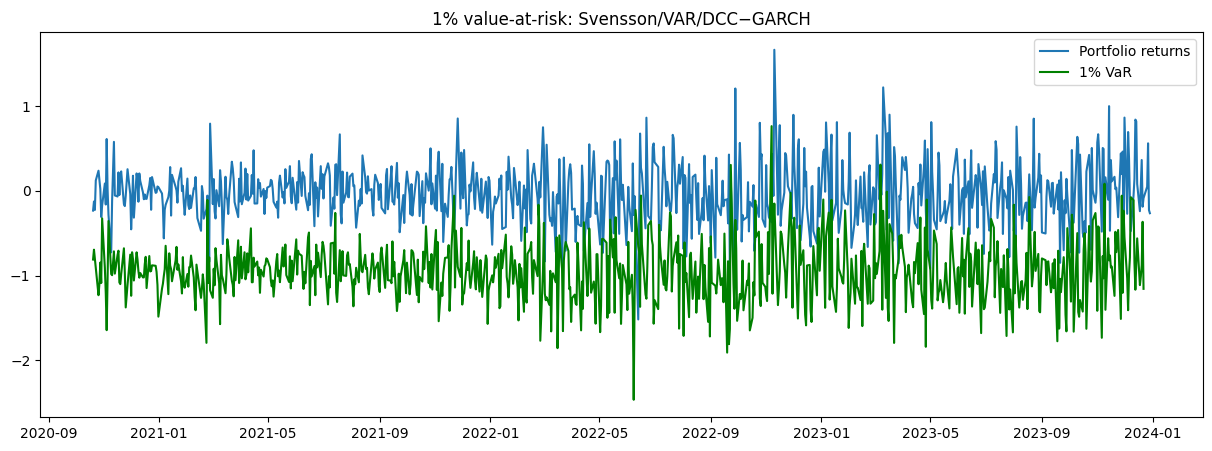

Exceeding Rate:0.024879614767255216


In [55]:
from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_var.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

print("Value at Risk (VaR) for the portfolio at different confidence levels:")
for var_q, VaR in VaR_results.items():
    print(f"{var_q*100}% VaR: {VaR}")

VaR.index = portfolio_returns.index[:-4]

# Plot the results
plt.figure(figsize=(15,5))
plt.plot(portfolio_returns[450:], label='Portfolio returns')
plt.plot(VaR[450:], label='1% VaR', color='green')
plt.title('1% value-at-risk: Svensson/VAR/DCC−GARCH')
plt.legend()
plt.show()

cnt = 0
for i  in range(len(VaR)):
    if VaR[i] >= portfolio_returns[i]:
        cnt += 1

print(f"Exceeding Rate:{cnt/len(VaR)}")

# Backtesting Results

In [56]:
import numpy as np
import pandas as pd
from scipy.stats import chi2, norm

def backtesting_result(VaR_results, portfolio_returns_v2, percentage):
        VaR_threshold = VaR_results[percentage]
        portfolio_returns_v2.index = VaR_threshold.index

        # Create Hit Sequence
        hits = portfolio_returns_v2 < VaR_threshold
        hit_sequence = hits.astype(int)  # 1 where there's a VaR breach, 0 otherwise

        # Unconditional Coverage Test
        n_breaches = hit_sequence.sum()
        n_periods = len(hit_sequence)
        expected_breaches = n_periods * percentage  # For a 1% VaR
        observed_frequency = n_breaches / n_periods

        # Using a Binomial Test to test if observed breaches significantly differ from expected
        p_value_uc = 1 - chi2.cdf(-2 * (np.log((1 - 0.01) ** (n_periods - n_breaches) * 0.01 ** n_breaches) -
                                      np.log((1 - observed_frequency) ** (n_periods - n_breaches) * observed_frequency ** n_breaches)), 1)

         # Independence Test
         # We'll use the autocorrelation of the hit sequence at lag 1
        lag1_acf = hit_sequence.autocorr(lag=1)
        independence_p_value = 1 - chi2.cdf(n_periods * (lag1_acf ** 2), 1)

        print("hit rate:", expected_breaches)
        print("Independence Test p-value:", independence_p_value)
        print("Unconditional Coverage Test p-value:", p_value_uc)

### NS - AR -DCCGARCH

In [57]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

# Assuming parameters_df is filled correctly
data = {
    'beta1': parameters_NS_df['beta1'].tolist(),
    'beta2': parameters_NS_df['beta2'].tolist(),
    'beta3': parameters_NS_df['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_NS_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

covariance_matrix_set = []
for i in range(len(final_NS_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_ar.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

backtesting_result(VaR_results, portfolio_returns[:-4], 0.01)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.025)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.05)

hit rate: 12.46
Independence Test p-value: 0.00032125242236213936
Unconditional Coverage Test p-value: 3.364187032950383e-06
hit rate: 31.150000000000002
Independence Test p-value: 0.00025446207993629066
Unconditional Coverage Test p-value: 0.0
hit rate: 62.300000000000004
Independence Test p-value: 0.00022459247557515827
Unconditional Coverage Test p-value: 0.0


### NS - AR - CCCGARCH

In [58]:
def ccc_garch(residuals, volatilities):
    T = residuals.shape[0]
    num_assets = residuals.shape[1]
    # Empirical correlation matrix of residuals
    R_bar = np.cov(residuals.T)

    conditional_cov_matrices = []
    for t in range(T):
        D_t = np.diag(volatilities[t])
        # Conditional covariance matrix using constant correlation
        conditional_cov_matrix = D_t @ R_bar @ D_t
        conditional_cov_matrices.append(conditional_cov_matrix)

    return conditional_cov_matrices

final_NS_ccc_cov_matrices = ccc_garch(resid_df.values, D_t)
final_NS_ccc_cov_matrices = D_t @ np.cov(resid_df.values.T) @ D_t

covariance_matrix_set = []
for i in range(len(final_NS_ccc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_ccc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]
    
weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_ar.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

backtesting_result(VaR_results, portfolio_returns[:-4], 0.01)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.025)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.05)

hit rate: 12.46
Independence Test p-value: 0.00032125242236213936
Unconditional Coverage Test p-value: 3.364187032950383e-06
hit rate: 31.150000000000002
Independence Test p-value: 0.00025446207993629066
Unconditional Coverage Test p-value: 0.0
hit rate: 62.300000000000004
Independence Test p-value: 0.00022459247557515827
Unconditional Coverage Test p-value: 0.0


### NS - VAR - DCCGARCH

In [59]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

# Assuming parameters_df is filled correctly
data = {
    'beta1': parameters_NS_df['beta1'].tolist(),
    'beta2': parameters_NS_df['beta2'].tolist(),
    'beta3': parameters_NS_df['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_NS_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

covariance_matrix_set = []
for i in range(len(final_NS_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_var.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

backtesting_result(VaR_results, portfolio_returns[:-4], 0.01)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.025)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.05)

hit rate: 12.46
Independence Test p-value: 0.0005946851865114011
Unconditional Coverage Test p-value: 1.2190704217207582e-06
hit rate: 31.150000000000002
Independence Test p-value: 0.00025446207993629066
Unconditional Coverage Test p-value: 0.0
hit rate: 62.300000000000004
Independence Test p-value: 0.0009554561072574463
Unconditional Coverage Test p-value: 0.0


### NS - VAR - CCCGARCH

In [60]:
def ccc_garch(residuals, volatilities):
    T = residuals.shape[0]
    num_assets = residuals.shape[1]
    # Empirical correlation matrix of residuals
    R_bar = np.cov(residuals.T)

    conditional_cov_matrices = []
    for t in range(T):
        D_t = np.diag(volatilities[t])
        # Conditional covariance matrix using constant correlation
        conditional_cov_matrix = D_t @ R_bar @ D_t
        conditional_cov_matrices.append(conditional_cov_matrix)

    return conditional_cov_matrices

final_NS_ccc_cov_matrices = ccc_garch(resid_df.values, D_t)
final_NS_ccc_cov_matrices = D_t @ np.cov(resid_df.values.T) @ D_t

covariance_matrix_set = []
for i in range(len(final_NS_ccc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_ccc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]
    
weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_var.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

backtesting_result(VaR_results, portfolio_returns[:-4], 0.01)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.025)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.05)

hit rate: 12.46
Independence Test p-value: 0.0005946851865114011
Unconditional Coverage Test p-value: 1.2190704217207582e-06
hit rate: 31.150000000000002
Independence Test p-value: 0.00025446207993629066
Unconditional Coverage Test p-value: 0.0
hit rate: 62.300000000000004
Independence Test p-value: 0.0009554561072574463
Unconditional Coverage Test p-value: 0.0


### Svensson - AR - DCCGARCH

In [61]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

# Assuming parameters_df is filled correctly
data = {
    'beta1': parameters_df_svensson['beta1'].tolist(),
    'beta2': parameters_df_svensson['beta2'].tolist(),
    'beta3': parameters_df_svensson['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_NS_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

covariance_matrix_set = []
for i in range(len(final_NS_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_ar.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

backtesting_result(VaR_results, portfolio_returns[:-4], 0.01)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.025)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.05)

hit rate: 12.46
Independence Test p-value: 0.003467614115673978
Unconditional Coverage Test p-value: 0.6714539825986827
hit rate: 31.150000000000002
Independence Test p-value: 1.1271799127410276e-07
Unconditional Coverage Test p-value: 0.0035636806888623695
hit rate: 62.300000000000004
Independence Test p-value: 0.00016350155179800652
Unconditional Coverage Test p-value: 9.009030381701422e-06


### Svensson - AR - CCCGARCH

In [62]:
def ccc_garch(residuals, volatilities):
    T = residuals.shape[0]
    num_assets = residuals.shape[1]
    # Empirical correlation matrix of residuals
    R_bar = np.cov(residuals.T)

    conditional_cov_matrices = []
    for t in range(T):
        D_t = np.diag(volatilities[t])
        # Conditional covariance matrix using constant correlation
        conditional_cov_matrix = D_t @ R_bar @ D_t
        conditional_cov_matrices.append(conditional_cov_matrix)

    return conditional_cov_matrices

final_NS_ccc_cov_matrices = ccc_garch(resid_df.values, D_t)
final_NS_ccc_cov_matrices = D_t @ np.cov(resid_df.values.T) @ D_t

covariance_matrix_set = []
for i in range(len(final_NS_ccc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_ccc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]
    
weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_var.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

backtesting_result(VaR_results, portfolio_returns[:-4], 0.01)

hit rate: 12.46
Independence Test p-value: 0.008623026804022271
Unconditional Coverage Test p-value: 0.8951558351556483


### Svensson - VAR - DCCGARCH

In [63]:
from scipy.optimize import minimize
from arch import arch_model
import numpy as np
import pandas as pd

# Assuming parameters_df is filled correctly
data = {
    'beta1': parameters_df_svensson['beta1'].tolist(),
    'beta2': parameters_df_svensson['beta2'].tolist(),
    'beta3': parameters_df_svensson['beta3'].tolist()
}

# Fit a GARCH model for each asset individually
standardized_residuals = {}
conditional_volatilities = {}

for key, series in data.items():
    series = np.array(series)
    # Define GARCH(1,1) model with a constant mean
    garch = arch_model(series, mean='Constant', vol='Garch', p=1, q=1)
    # Fit the model
    res = garch.fit(update_freq=5, disp='off')
    # Store the conditional volatilities for each asset
    standardized_residuals[key] = res.resid / res.conditional_volatility
    conditional_volatilities[key] = res.conditional_volatility

# Convert to DataFrame for easier manipulation
resid_df = pd.DataFrame(standardized_residuals)

# Empirical correlation matrix of standardized residuals
empirical_corr = resid_df.corr()

# Convert the conditional volatilities dictionary to a DataFrame for easier manipulation
vol_df = pd.DataFrame(conditional_volatilities)

# Calculate the diagonal matrix D_t at each time point
D_t = [np.diag(vol_df.iloc[t].values) for t in range(len(vol_df))]

# Define and compute the DCC model
def dcc_garch(resid, volatilities, alpha, beta):
    T = resid.shape[0]
    # Start with the empirical covariance matrix of residuals
    Q_bar = np.cov(resid.T)
    Q_t = np.zeros((T, Q_bar.shape[0], Q_bar.shape[1]))
    Q_t[0] = Q_bar
    for t in range(1, T):
        # The outer product of residuals at time t-1
        u = np.outer(resid[t-1], resid[t-1])
        # Update the Q matrix
        Q_t[t] = (1 - alpha - beta) * Q_bar + alpha * u + beta * Q_t[t-1]
        # Normalize Q to make it a correlation matrix
        diag = np.sqrt(np.diag(Q_t[t]))
        Q_t[t] /= np.outer(diag, diag)
    # Calculate the conditional covariance matrix at each time point based on D_t and Q_t
    conditional_cov_matrices = [volatilities[t] @ Q_t[t] @ volatilities[t] for t in range(T)]
    return conditional_cov_matrices

# Assuming resid_df is the DataFrame of residuals and initial alpha, beta are given
# Calculate the conditional covariance matrices using the DCC model
final_NS_dcc_cov_matrices = dcc_garch(resid_df.values, D_t, 0.01, 0.98)

covariance_matrix_set = []
for i in range(len(final_NS_dcc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_dcc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]

from arch import arch_model
import matplotlib.pyplot as plt
from scipy.stats import norm

weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_var.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

backtesting_result(VaR_results, portfolio_returns[:-4], 0.01)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.025)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.05)

hit rate: 12.46
Independence Test p-value: 0.008623026804022271
Unconditional Coverage Test p-value: 0.8951558351556483
hit rate: 31.150000000000002
Independence Test p-value: 5.662262498884463e-05
Unconditional Coverage Test p-value: 0.007262102843107465
hit rate: 62.300000000000004
Independence Test p-value: 0.00016350155179800652
Unconditional Coverage Test p-value: 9.009030381701422e-06


### Svensson - VAR - CCCGARCH

In [64]:
def ccc_garch(residuals, volatilities):
    T = residuals.shape[0]
    num_assets = residuals.shape[1]
    # Empirical correlation matrix of residuals
    R_bar = np.cov(residuals.T)

    conditional_cov_matrices = []
    for t in range(T):
        D_t = np.diag(volatilities[t])
        # Conditional covariance matrix using constant correlation
        conditional_cov_matrix = D_t @ R_bar @ D_t
        conditional_cov_matrices.append(conditional_cov_matrix)

    return conditional_cov_matrices

final_NS_ccc_cov_matrices = ccc_garch(resid_df.values, D_t)
final_NS_ccc_cov_matrices = D_t @ np.cov(resid_df.values.T) @ D_t

covariance_matrix_set = []
for i in range(len(final_NS_ccc_cov_matrices)):
    covariance_matrix = pd.DataFrame(np.outer(tau_values, tau_values) * (A @ final_NS_ccc_cov_matrices[0] @ A.T + np.diag(volatility_df.iloc[0])))
    covariance_matrix = covariance_matrix/100
    covariance_matrix_set += [covariance_matrix]
    
weights = np.ones(N) / N

# Calculate the conditional mean and variance of the portfolio return
portfolio_daily_mean = log_returns_df_var.dot(weights)


sigma_p_squared = weights.T @ covariance_matrix_set @ weights
sigma_p = np.sqrt(sigma_p_squared)

# Quantiles for VaR calculation at different confidence levels
confidence_levels = [0.01, 0.025, 0.05]

# Calculate VaR for each confidence level
VaR_results = {}
for var_q in confidence_levels:
    q = norm.ppf(var_q)
    VaR = portfolio_daily_mean + sigma_p[5:] * q
    VaR_results[var_q] = VaR

backtesting_result(VaR_results, portfolio_returns[:-4], 0.01)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.025)
backtesting_result(VaR_results, portfolio_returns[:-4], 0.05)

hit rate: 12.46
Independence Test p-value: 0.008623026804022271
Unconditional Coverage Test p-value: 0.8951558351556483
hit rate: 31.150000000000002
Independence Test p-value: 5.662262498884463e-05
Unconditional Coverage Test p-value: 0.007262102843107465
hit rate: 62.300000000000004
Independence Test p-value: 0.00016350155179800652
Unconditional Coverage Test p-value: 9.009030381701422e-06
